# HW 3

**Task 1**: На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение messi5.jpg

**Task 2**: В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).


In [141]:
import sys

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from math import sin, cos, pi

### Task 1.

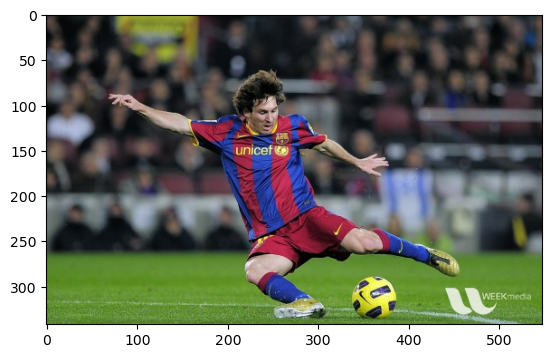

In [142]:
messi = cv.imread("images/messi5.jpg")
messi = cv.cvtColor(messi, cv.COLOR_BGR2RGB)
plt.imshow(messi)
plt.show()

In [143]:
def plot_compare(img_1: np.ndarray, img_2: np.ndarray) -> None:    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    plt.imshow(img_1)
    plt.title('Before')
    
    plt.subplot(122)
    plt.imshow(img_2)
    plt.title('After')
    plt.show()

In [144]:
messi.shape[:2]

(342, 548)

In [145]:
tuple(np.array(messi.shape[1::-1]) / 2)

(274.0, 171.0)

In [146]:
def rotate_image(img, angle):
    angle = angle * pi / 180

    height, width = img.shape[:2]
    center = (width // 2, height // 2)

    a = cos(angle)
    b = sin(angle)

    M = np.float32([
        [a, b, (1 - a) * center[0] - b * center[1]],
        [-b, a, b * center[0] + (1 - a) * center[1]]]
    )

    # Посчитаем размер повернутого изображения, чтобы не обрезалось
    cos_theta = np.abs(M[0, 0])
    sin_theta = np.abs(M[0, 1])
    new_width = int((height * sin_theta) + (width * cos_theta))
    new_height = int((height * cos_theta) + (width * sin_theta))

    M[0, 2] += (new_width / 2) - center[0]
    M[1, 2] += (new_height / 2) - center[1]

    img_rotated = cv.warpAffine(img, M, (new_width, new_height))
    return img_rotated

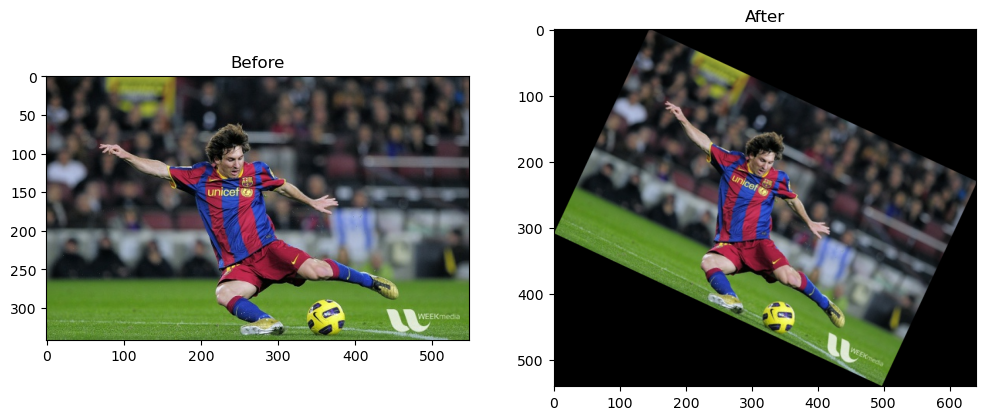

In [147]:
plot_compare(messi, rotate_image(messi, -25))

#### Task 2. Возвращаем к исходному виду остальные изображения

In [148]:
apple = cv.imread('images/apple.jpg')
apple = cv.cvtColor(apple, cv.COLOR_BGR2RGB)

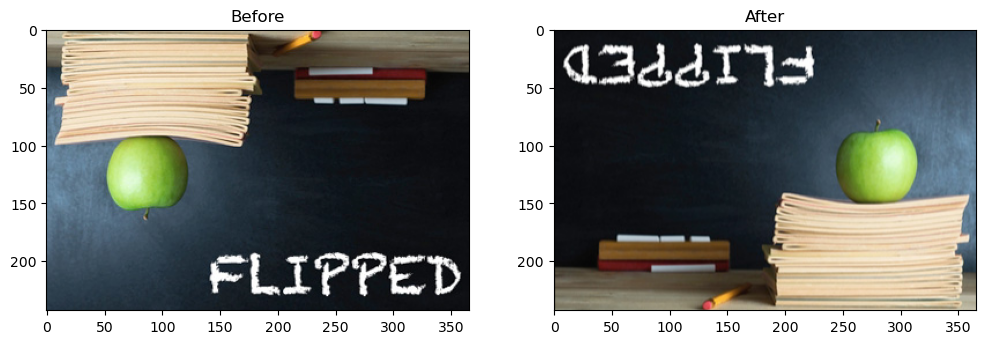

In [149]:
# ну для начала
plot_compare(apple, rotate_image(apple, 180))

In [150]:
height, width = apple.shape[:2]

center = (width // 2, height // 2)
    
x = 1
y = -1

M = np.float32([
    [x, 0, 0],
    [0, y, height]]
)

apple_flipped = cv.warpAffine(apple, M, (int(width * x), int(height * y)))

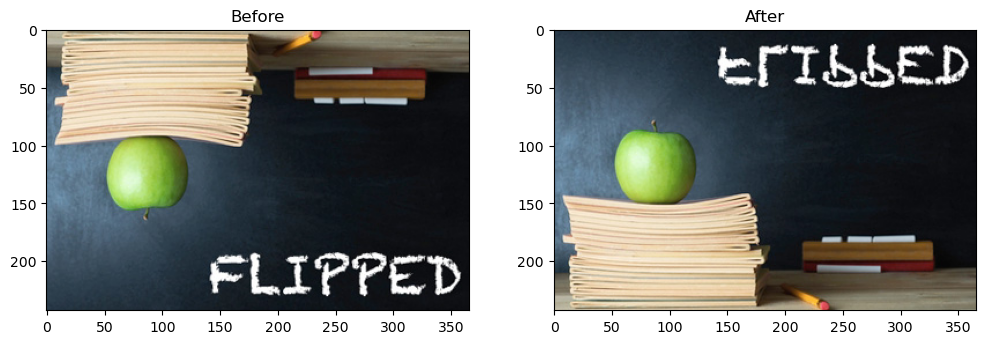

In [151]:
plot_compare(apple, apple_flipped)
# а еще есть cv.flip

In [152]:
phone = cv.imread('images/phone.png')
phone = cv.cvtColor(phone, cv.COLOR_BGR2RGB)

In [153]:
phone_resized = cv.resize(phone, dsize=None, fx=0.23, fy=0.72, interpolation=cv.INTER_CUBIC)

In [154]:
height, width = phone.shape[:2]

center = (width // 2, height // 2)

x = 0.3
y = 1
M = np.float32([
    [x, -0.1, 70],
    [0, y, 0]]
)

phone_resized2 = cv.warpAffine(phone, M,
                               (int(width * x), int(height * y)))

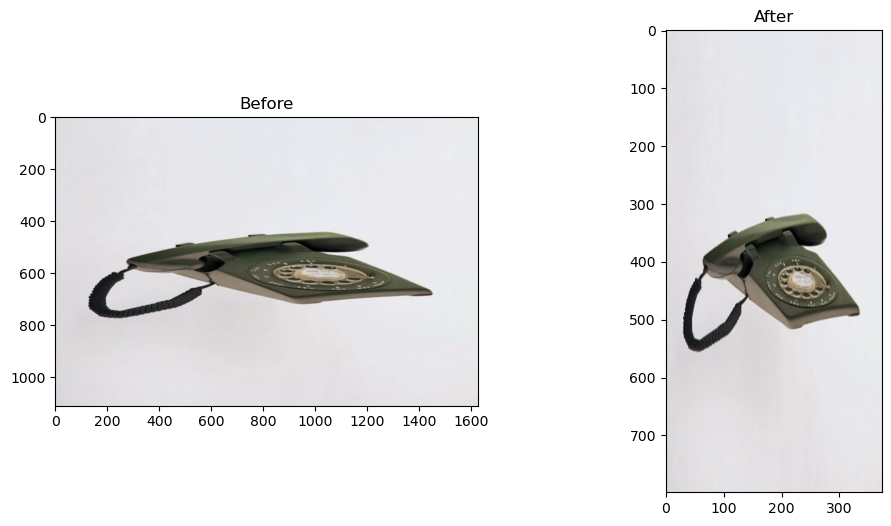

In [155]:
plot_compare(phone, phone_resized)

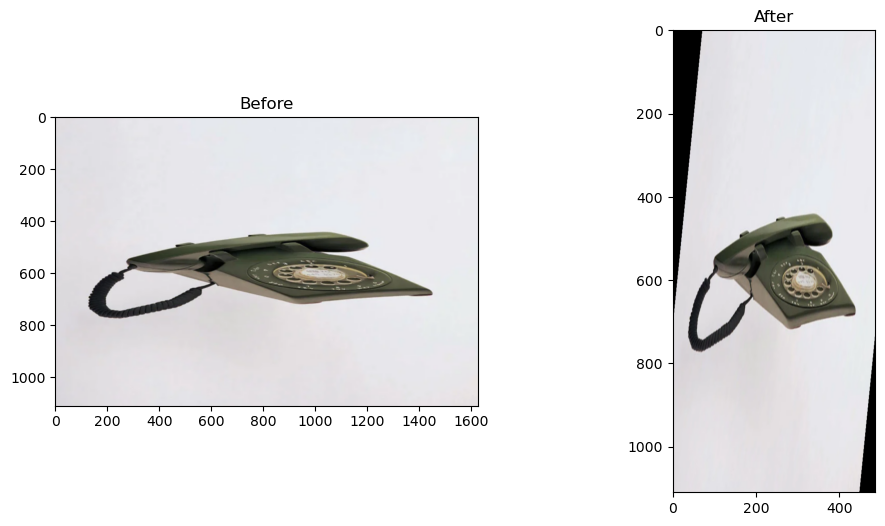

In [156]:
plot_compare(phone, phone_resized2)

In [157]:
skull = cv.imread('images/skull.png')
skull = cv.cvtColor(skull, cv.COLOR_BGR2RGB)

In [158]:
height, width = skull.shape[:2]

dim_1 = np.float32([[450, 220], [1400, 200], [1100, 510]])
dim_2 = np.float32([[310, 10], [920, 200], [900, 500]])
M = cv.getAffineTransform(dim_1, dim_2)

skull_fixed = cv.warpAffine(skull, M, (width, height), borderMode=cv.BORDER_REPLICATE)
skull_fixed = skull_fixed[150:900, 650:1050]
skull_fixed = cv.resize(skull_fixed, dsize=None, fx=1.5, fy=1, interpolation=cv.INTER_AREA)

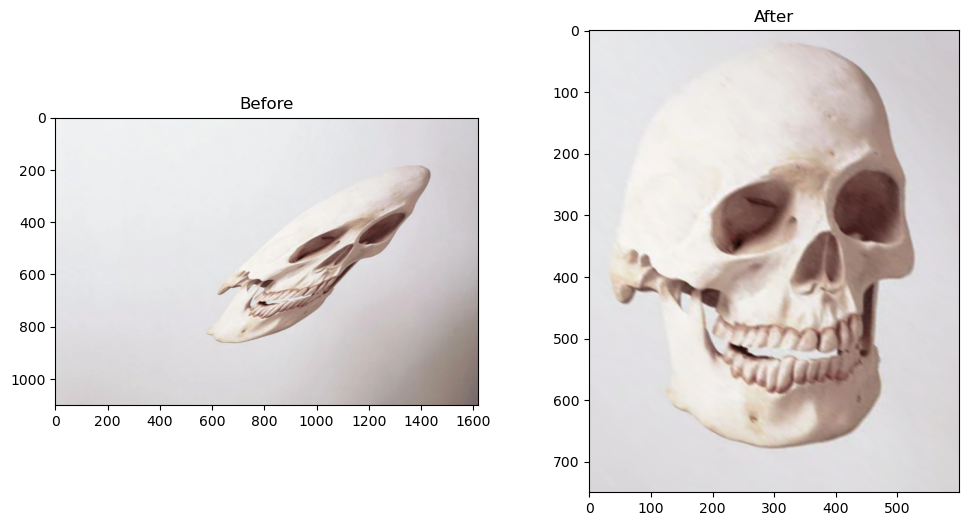

In [159]:
plot_compare(skull, skull_fixed)

In [160]:
text = cv.imread('images/text.png')
text = cv.cvtColor(text, cv.COLOR_BGR2RGB)

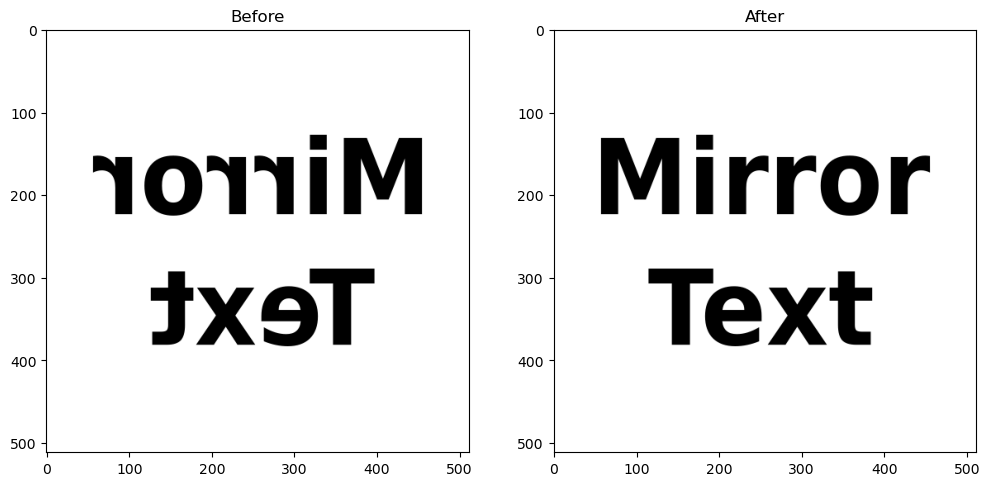

In [161]:
plot_compare(text, cv.flip(text, 1))

### Prepractice

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

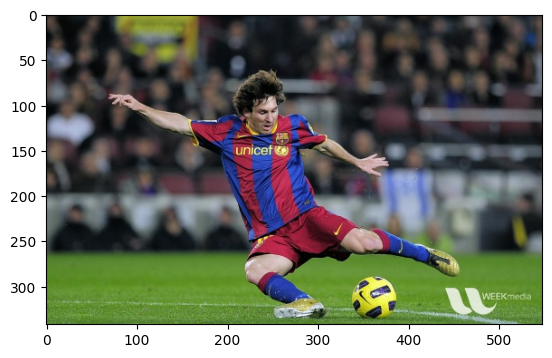

In [3]:
img = cv.imread('assets/messi5.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

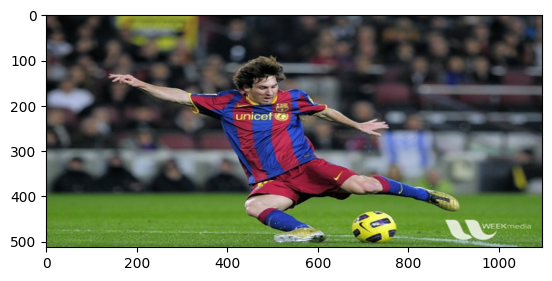

In [4]:
# Пример 1: используем коэффициенты масштабирования.
img_res = cv.resize(img, dsize=None, fx=2, fy=1.5, interpolation=cv.INTER_CUBIC)
plt.imshow(img_res)

In [5]:
print(img.shape)
print(img_res.shape)

(342, 548, 3)
(513, 1096, 3)


(50, 75, 3)


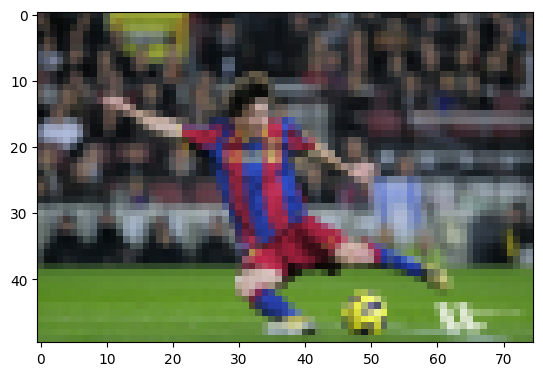

In [13]:
# Пример 1.2: то же самое мы можем сделать, используя размеры исходного изображения.
# height, width = img.shape[:2]
# img_res = cv.resize(img, dsize=(2 * width, int(1.5 * height)), interpolation=cv.INTER_CUBIC)

# Пример 1.3: указываем произвольный размер изображения.
img_res = cv.resize(img, dsize=(75, 50), interpolation=cv.INTER_AREA)

# Пример 1.4: используем другой способ для интерполяции пикселей.
# img_res = cv.resize(img, dsize=(400, 200), interpolation=cv.INTER_AREA)

plt.imshow(img_res)
print(img_res.shape)

In [20]:
tx = 100
ty = 50
M = np.float32([
    [1, 0, tx],
    [0, 1, ty],
]
)

(342, 548, 3)


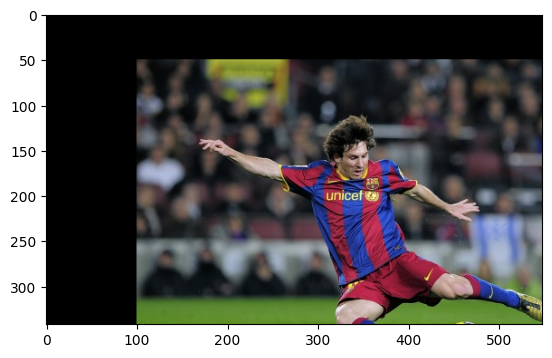

In [21]:
height, width = img.shape[:2]
# Внимание: мы указываем width, height в другом порядке!
img_res = cv.warpAffine(img, M, (width, height))

plt.imshow(img_res)
print(img_res.shape)

In [22]:
sx = 2
sy = 1.5
M = np.float32([
    [sx, 0, 0],
    [0, sy, 0],
]
)

(513, 1096, 3)


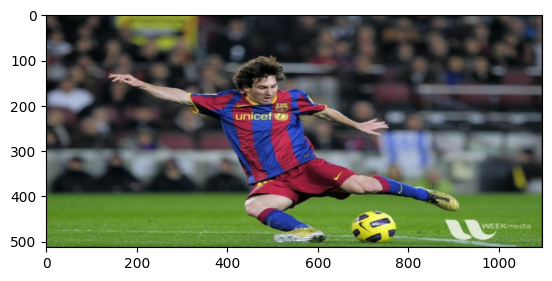

In [25]:
height, width = img.shape[:2]
# Внимание: мы указываем width, height в другом порядке!
img_res = cv.warpAffine(img, M, (int(width * sx), int(height * sy)))

plt.imshow(img_res)
print(img_res.shape)

(342, 548, 3)


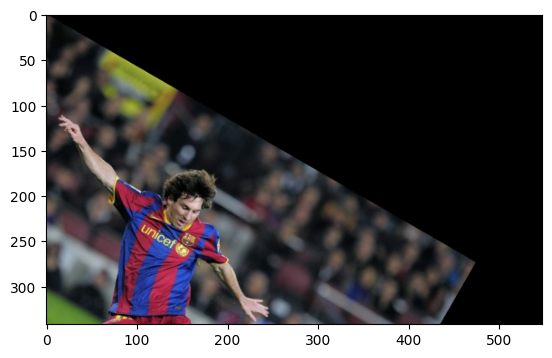

In [26]:
from math import sin, cos, pi

angle = 30 * pi / 180
M = np.float32([
    [cos(angle), -sin(angle), 0],
    [sin(angle), cos(angle), 0]]
)

height, width = img.shape[:2]
img_res = cv.warpAffine(img, M, (width, height))

plt.imshow(img_res)
print(img_res.shape)

In [27]:
# Как объединять матрицы преобразования в композицию?
# M3 * M2 * M1 * v
# M = M3 * M2 * M1
# M * v